# 1: Mô hình SVM cho bài toán XOR với các kernel khác nhau

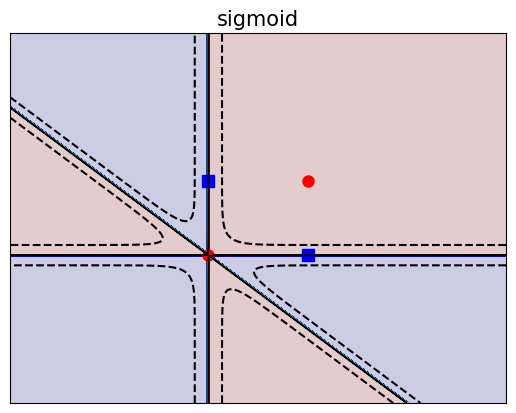

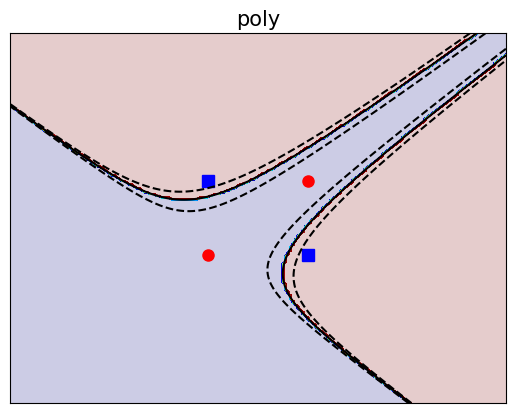

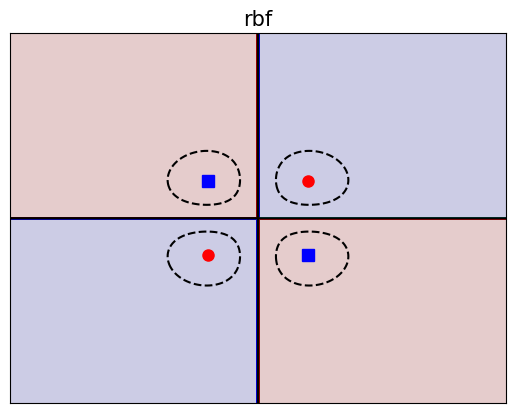

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages # Xuất đồ thị thành PDF
from sklearn import svm

# XOR dataset and targets
X = np.c_[(0, 0), 
          (1, 1),
          #---
          (1, 0),
          (0, 1)].T # Đây là tập dữ liệu XOR gồm 4 điểm
Y = [0] * 2 + [1] * 2 # Nhãn của tập dữ liệu XOR, trong đó hai điểm đầu có nhãn 0 và hai điểm sau có nhãn 1

fignum = 1

# fit the model
for kernel in ('sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=4, coef0 = 0)
    clf.fit(X, Y)

# Vẽ và lưu đồ thị
    with PdfPages(kernel + '2.pdf') as pdf: # Lưu đồ thị dưới dạng PDF. Tên file sẽ là loại kernel
        # plot the line, the points, and the nearest vectors to the plane
        fig, ax = plt.subplots()
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()

# Vẽ điểm dữ liệu và siêu phẳng
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='None')
        plt.plot(X[:2, 0], X[:2, 1], 'ro', markersize = 8)
        plt.plot(X[2:, 0], X[2:, 1], 'bs', markersize = 8)

# Thiết lập các trục và vẽ siêu phẳng
        plt.axis('tight')
        x_min, x_max = -2, 3
        y_min, y_max = -2, 3
        
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot: Vẽ đồ thị hàm quyết định
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2) # Vẽ các đường đồng mức của hàm quyết định
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5]) # Vẽ đường bao quanh siêu phẳng với các kiểu đường khác nhau
        plt.title(kernel, fontsize = 15)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
        pdf.savefig()
plt.show()

# 2: Huấn luyện và đánh giá SVM trên bộ dữ liệu khác

In [3]:
import scipy.io as sio # Thư viện hỗ trợ thao tác với file .mat.
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

A = sio.loadmat('myARgender.mat') # Tải dữ liệu từ file .mat
X_train = A['Y_train'].T 
X_test = A['Y_test'].T 
N = 700
y_train = A['label_train'].reshape(N)
y_test = A['label_test'].reshape(N)

# Huấn luyện mô hình và tính độ chính xác
clf = SVC(kernel='poly', degree = 3, gamma=1, C = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy: 92.86 %
